In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [1]:
import numpy as np

mnist_X, mnist_y = mnist['data'], mnist['target'].astype(np.uint8)

NameError: name 'mnist' is not defined

In [6]:
mnist_X.shape, mnist_y.shape

((70000, 784), (70000,))

In [7]:
from math import sqrt

sqrt(mnist_X.shape[1])

28.0

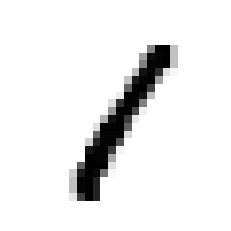

In [13]:
import matplotlib as mpl
import matplotlib.pyplot as plt

x = mnist_X[3]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

In [46]:
import numpy as np
y[0]

5

In [15]:
partition = 60000

mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = mnist_X[:partition], mnist_X[partition:], mnist_y[:partition], mnist_y[partition:]

In [16]:
from sklearn.linear_model import SGDClassifier

is_5_mnist_y_train = (mnist_y_train == 4)

sgd_classifier = SGDClassifier(random_state=42)
sgd_classifier.fit(mnist_X_train, is_5_mnist_y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

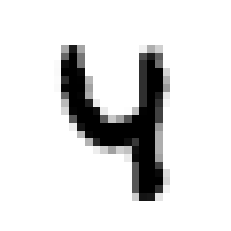

In [54]:
x = mnist_X_test[971]
plt.imshow(x.reshape(28, 28), cmap='binary')
plt.axis('off')
plt.show()

In [55]:
sgd_classifier.predict([x])

array([ True])

In [107]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_classifier, mnist_X_train, is_5_mnist_y_train, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])